### Question 4

#### Import relevant packages

In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

#### (a) Load the dataset `binary_alpha_digits` from `tensorflow_datasets`. Split the dataset into 60% for training and 40% for testing [**2 points**]

In [3]:
import tensorflow_datasets as tfds

## write your code here
[train, test], info = tfds.load("binary_alpha_digits", split = ["train[:60%]", "train[60%:]"], with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\binary_alpha_digits\1.0.0.incompleteRX3RXW\binary_alpha_digits-train.tfrecord*…

Dataset binary_alpha_digits downloaded and prepared to ~\tensorflow_datasets\binary_alpha_digits\1.0.0. Subsequent calls will reuse this data.


In [4]:
## write your code here to split data into 60% train 40% test
import numpy as np

train_images = np.array(list(map(lambda x:x["image"].numpy(), train)))
train_labels = np.array(list(map(lambda x:x["label"].numpy(), train)))
test_images = np.array(list(map(lambda x:x["image"].numpy(), test)))
test_labels = np.array(list(map(lambda x:x["label"].numpy(), test)))

#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN. [**2 points**]

In [5]:
model = tf.keras.Sequential()

## write your code here to build your dense ANN
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(20, 16, 1)))
model.add(layers.Dense(1000, activation=tf.nn.relu))
model.add(layers.Dense(1000, activation=tf.nn.relu))
model.add(layers.Dense(36, activation=tf.nn.softmax))

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [36]

What is the activation function of your output layer? [softmax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [sparse_categorical_crossentropy]

In [6]:
### write your code here to compile model
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
### write your code here to train your model
epochs = 50
history = model.fit(train_images, train_labels, epochs=epochs, verbose = 0)

#### (e) Plot the training loss across the different epochs [**1 point**]

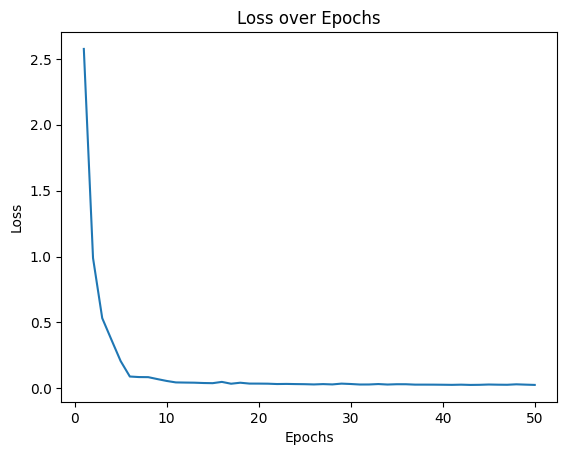

In [8]:
### write your code to plot training loss (hint: use history)

fig = plt.figure()
ax = fig.gca()
ax.plot([i for i in range(1, 51)], history.history["loss"])
ax.set_title("Loss over Epochs")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

plt.show()

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**2 points**]

In [9]:
#### write your code to report overall accuracy on test set

result = model.evaluate(test_images, test_labels, verbose = 0)
print(f"Overall accuracy: {result[1]:.2%}")

Overall accuracy: 74.38%


What is the overall accuracy? [74.20%]

In [15]:
### write your code to report per-class accuracy
### you have a list where index is the class label with value corresponding to accuracy for that class label
test_pred = model.predict(test_images)
output = np.array(list(map(lambda x, y: (np.where(x == max(x)) == y)[0, 0], test_pred, test_labels)))
classAccuracy = []

for i in range(36):
    classArray = output[np.where(test_labels == i)[0]]
    accuracy = sum(classArray)/classArray.size
    classAccuracy.append(accuracy)

print([round(i, 4) for i in classAccuracy])

18/18 [==============================] - 0s 7ms/step
[0.1765, 0.8235, 0.7692, 0.9286, 0.7647, 0.7143, 0.8889, 0.9091, 0.75, 0.9333, 0.9167, 0.8182, 0.9375, 0.7333, 0.8235, 0.8261, 0.25, 0.8125, 0.8333, 0.8333, 0.5625, 0.8125, 0.8, 0.5556, 0.3529, 0.8235, 0.75, 0.7619, 0.5455, 0.8462, 0.7, 0.7895, 0.6667, 0.9167, 0.7059, 0.8636]
